
# <span style="color:rgb(213,80,0)">Exercise 8.3</span>

Analysis of ad additional dataset. This file creates Figures A.48 and A.49

## Beginning of code

In [1]:
load inttrade3.mat
% This dataset refers to 'POD_0307591000_SN_IT'
X=inttrade3.Weight;
y=inttrade3.Value;
prin=0;
close all
X=X./max(X);
Z=log(X);
n=length(y);
% In this Exercise ART heteroskedasiticty is used
typeH='har';
typeH='art';

## Create Figure A.48

In [2]:
outH=FSRH(y,X,Z,'init',round(n*0.8),'plots',0, ...
    'typeH',typeH);

Total estimated time to complete LMS:  0.08 seconds 
Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=361 because
rmin(361,389)>99.99% and rmin(360,389)>99.99% and rmin(362,389)>99.99%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=360
Superimposition stopped because r_{min}(362,373)>99.9% envelope
Subsample of 372 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=17
Summary of the exceedances
           1          99         999        9999       99999
           0          33          30          25          22

In [3]:

% FSRHeda and forecasts
[outLXS]=LXS(y,X,'nsamp',10000);

Total estimated time to complete LMS:  0.11 seconds

In [4]:
outHEDA=FSRHeda(y,X,Z,outLXS.bs,'init',round(0.75*length(y)),'typeH',typeH);

m=100
m=200
m=300


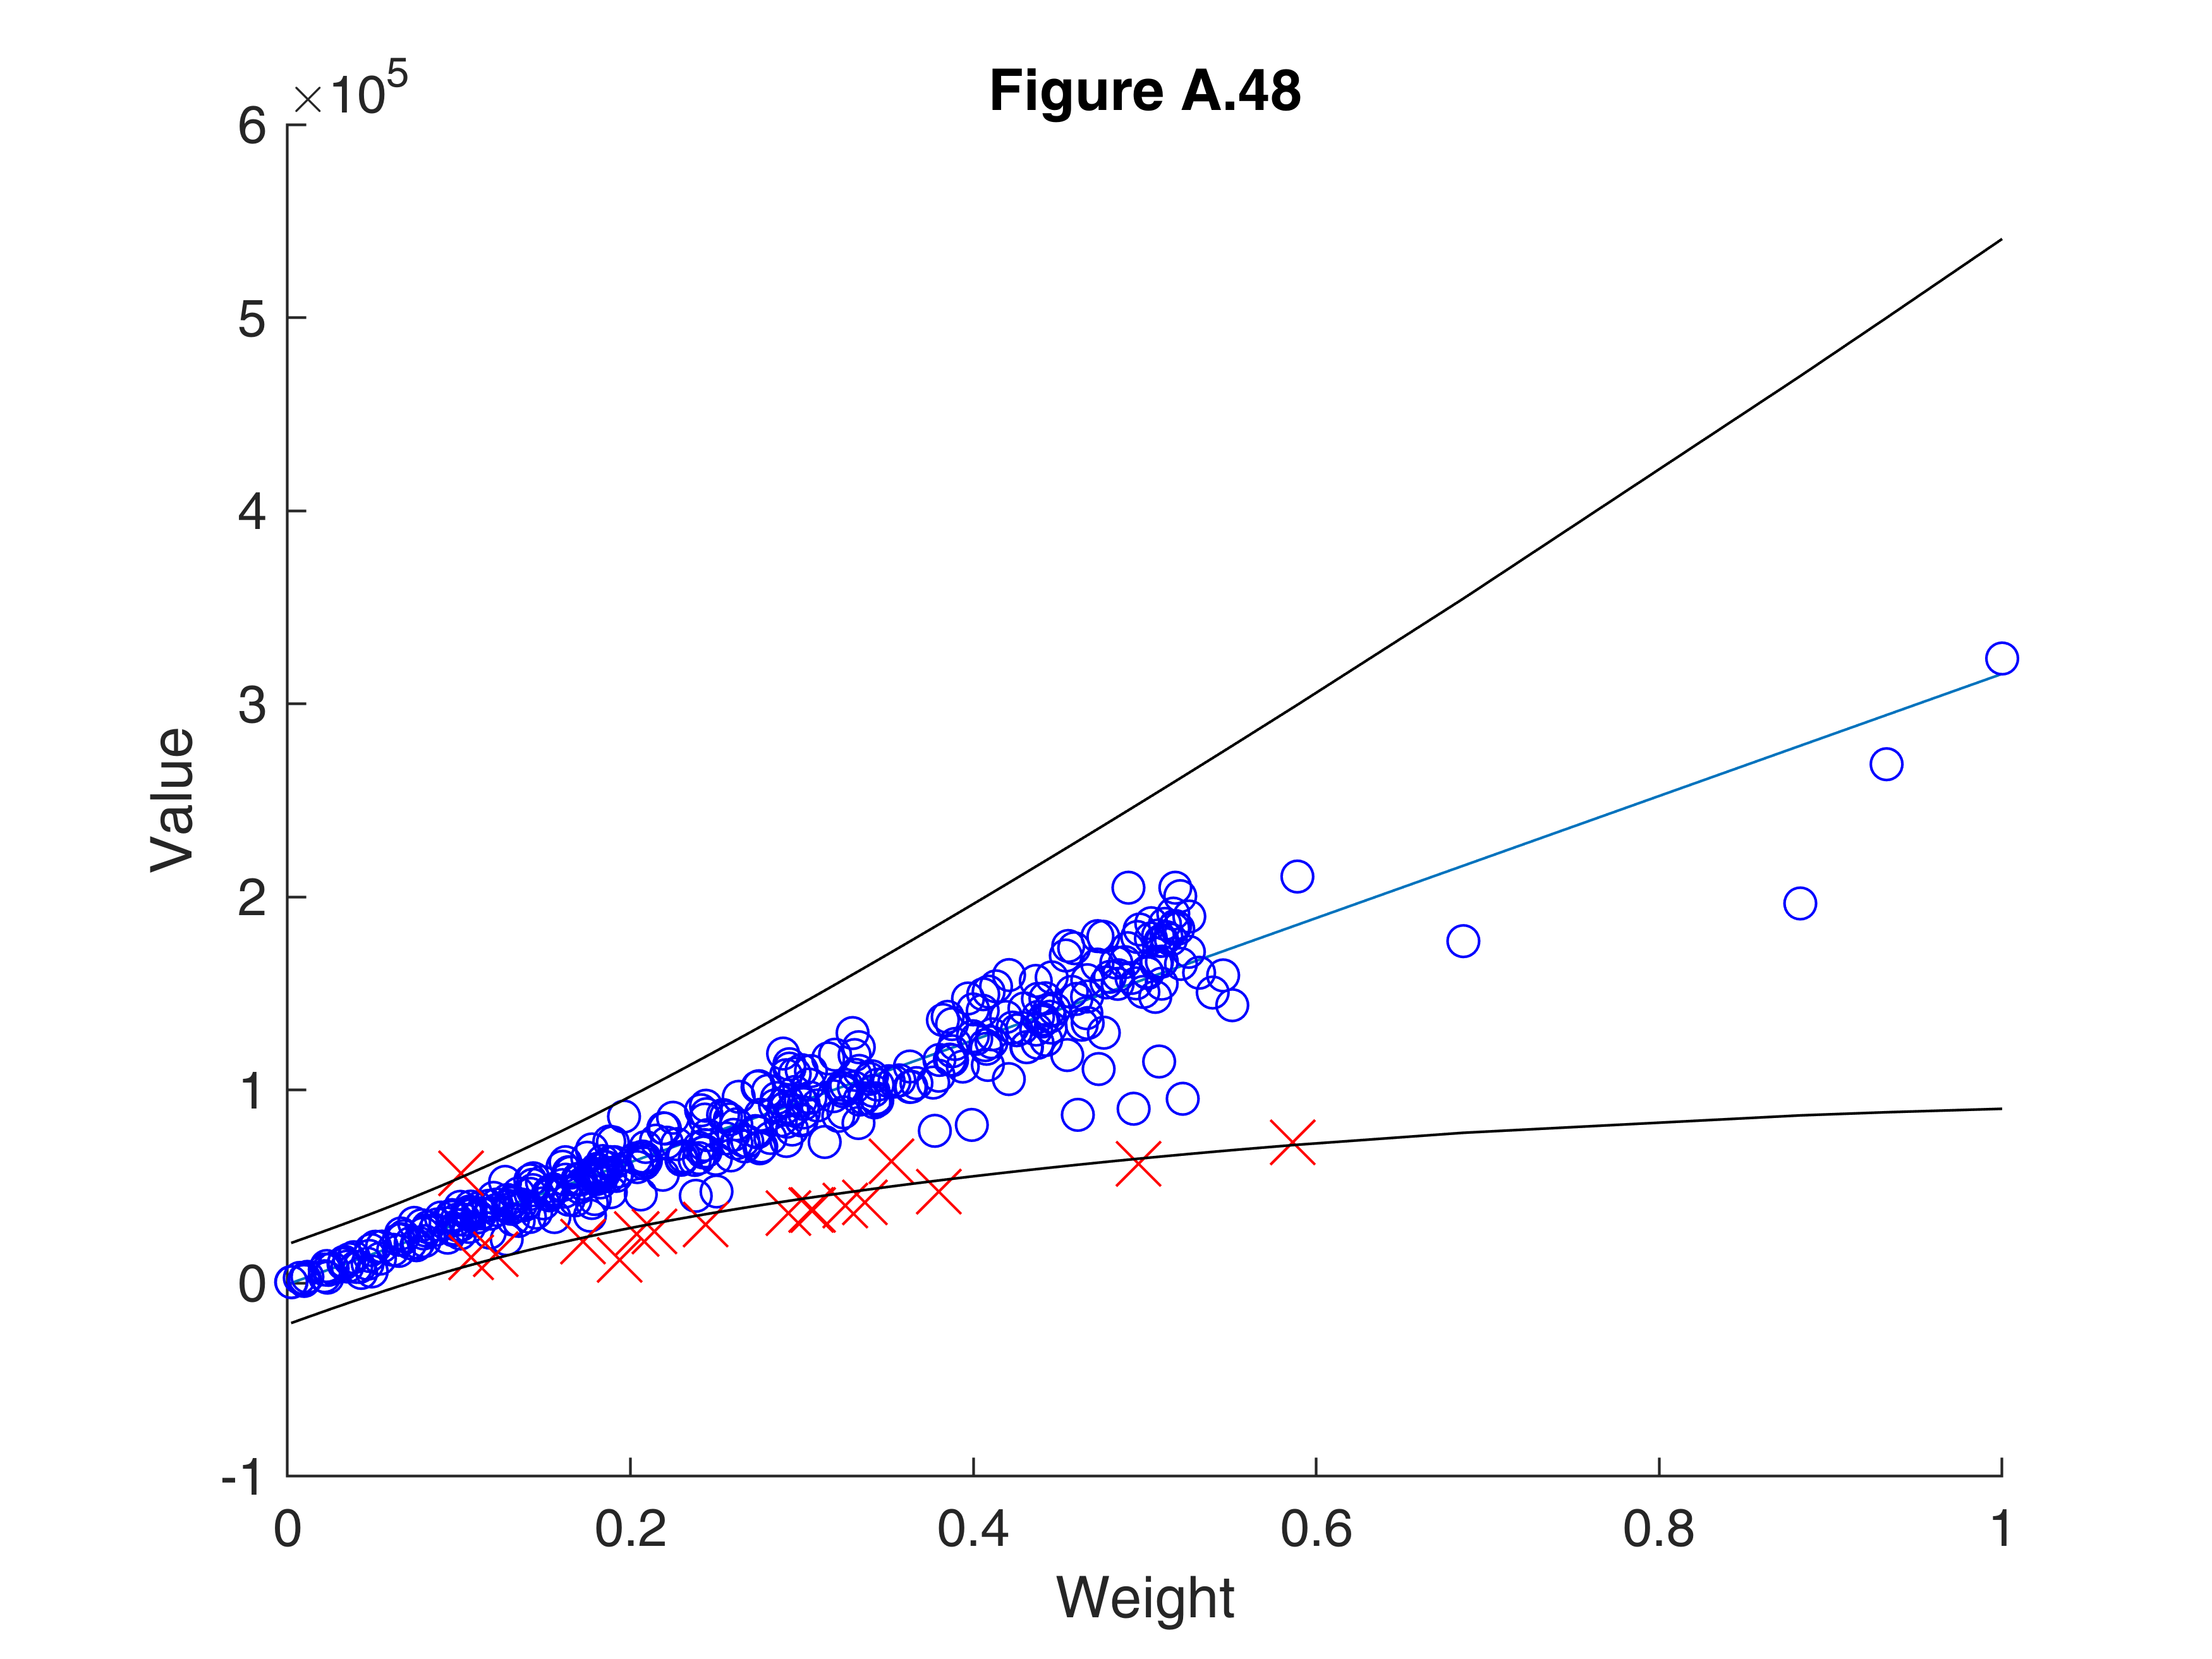

In [5]:

bsb=1:n;
if ~ismissing(outH.ListOut)
    outl=outH.ListOut;
    bsb(outl)=[];
end

figure
forecastH(y,X,Z,'outH',outHEDA,'bsb',bsb,'conflev',1-0.01/n);
ylabel('Value')
xlabel('Weight')
if prin==1
    print -depsc P30bandsH.eps;
end
set(gcf,'Name', 'Figure A.48');
title('Figure A.48')

## Create Figure A.49 (left panel)
<pre>
Homoskedatic  analysis
</pre>

In [6]:
outHOM=FSR(y,X,'init',round(0.7*length(n)));

Attention : init1 should be larger than p. 
It is set to p+1.Observed curve of r_min is at least 10 times greater than 99.99% envelope
--------------------------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=250 because
rmin(250,389)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=249
Superimposition stopped because r_{min}(250,311)>99.9% envelope
Subsample of 310 units is not homogeneous because the curve was above 99.99% and later it was below 1%
----------------------------------------
Probably there are two overlapping groups
Using the criterion of the maximum, the group of homogenous obs. is= 291
----------------------------
Final output
Number of units declared as outliers=98
Summary of the exceedances
           1          99         999        9999       99999
           1       


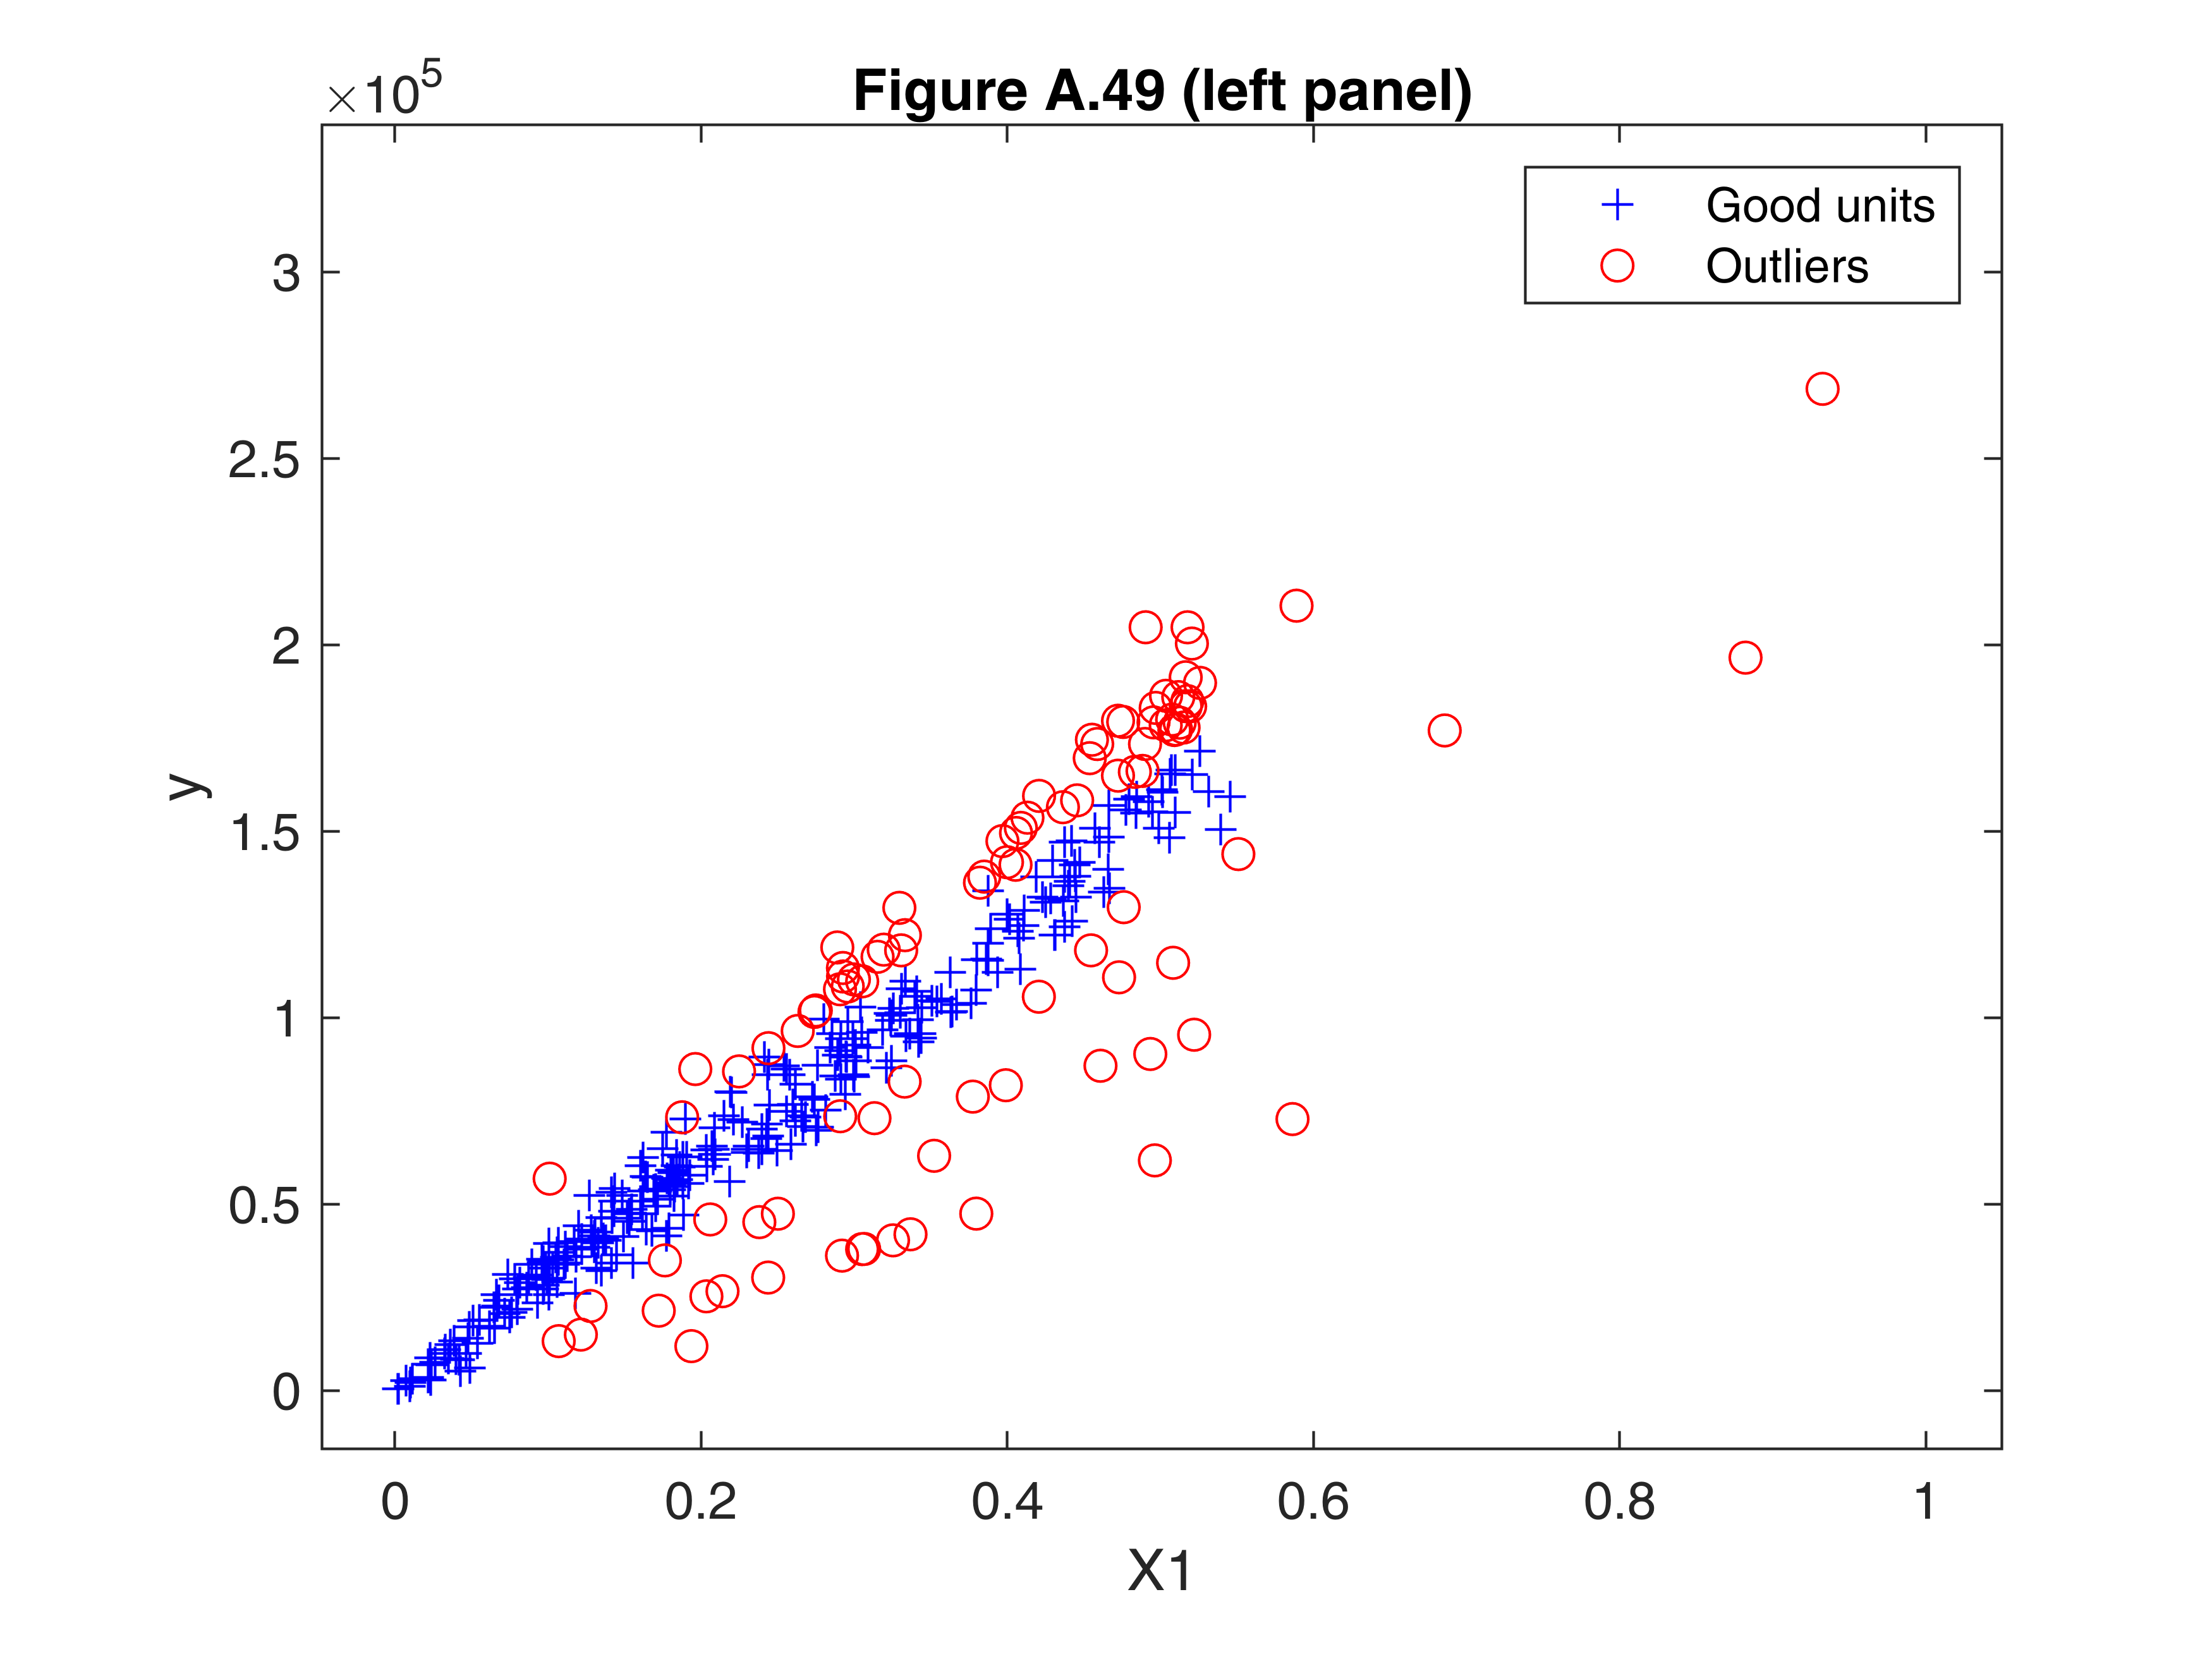

In [7]:

pl_fsr=findobj(0, 'type', 'figure','tag','pl_fsr');
close(figure(pl_fsr(end)))
pl_fsr=findobj(0, 'type', 'figure','tag','pl_yX');
set(gcf,'Name', 'Figure A.49 (left panel)');
title('Figure A.49 (left panel)')

## Create Figure A.49 (right panel)


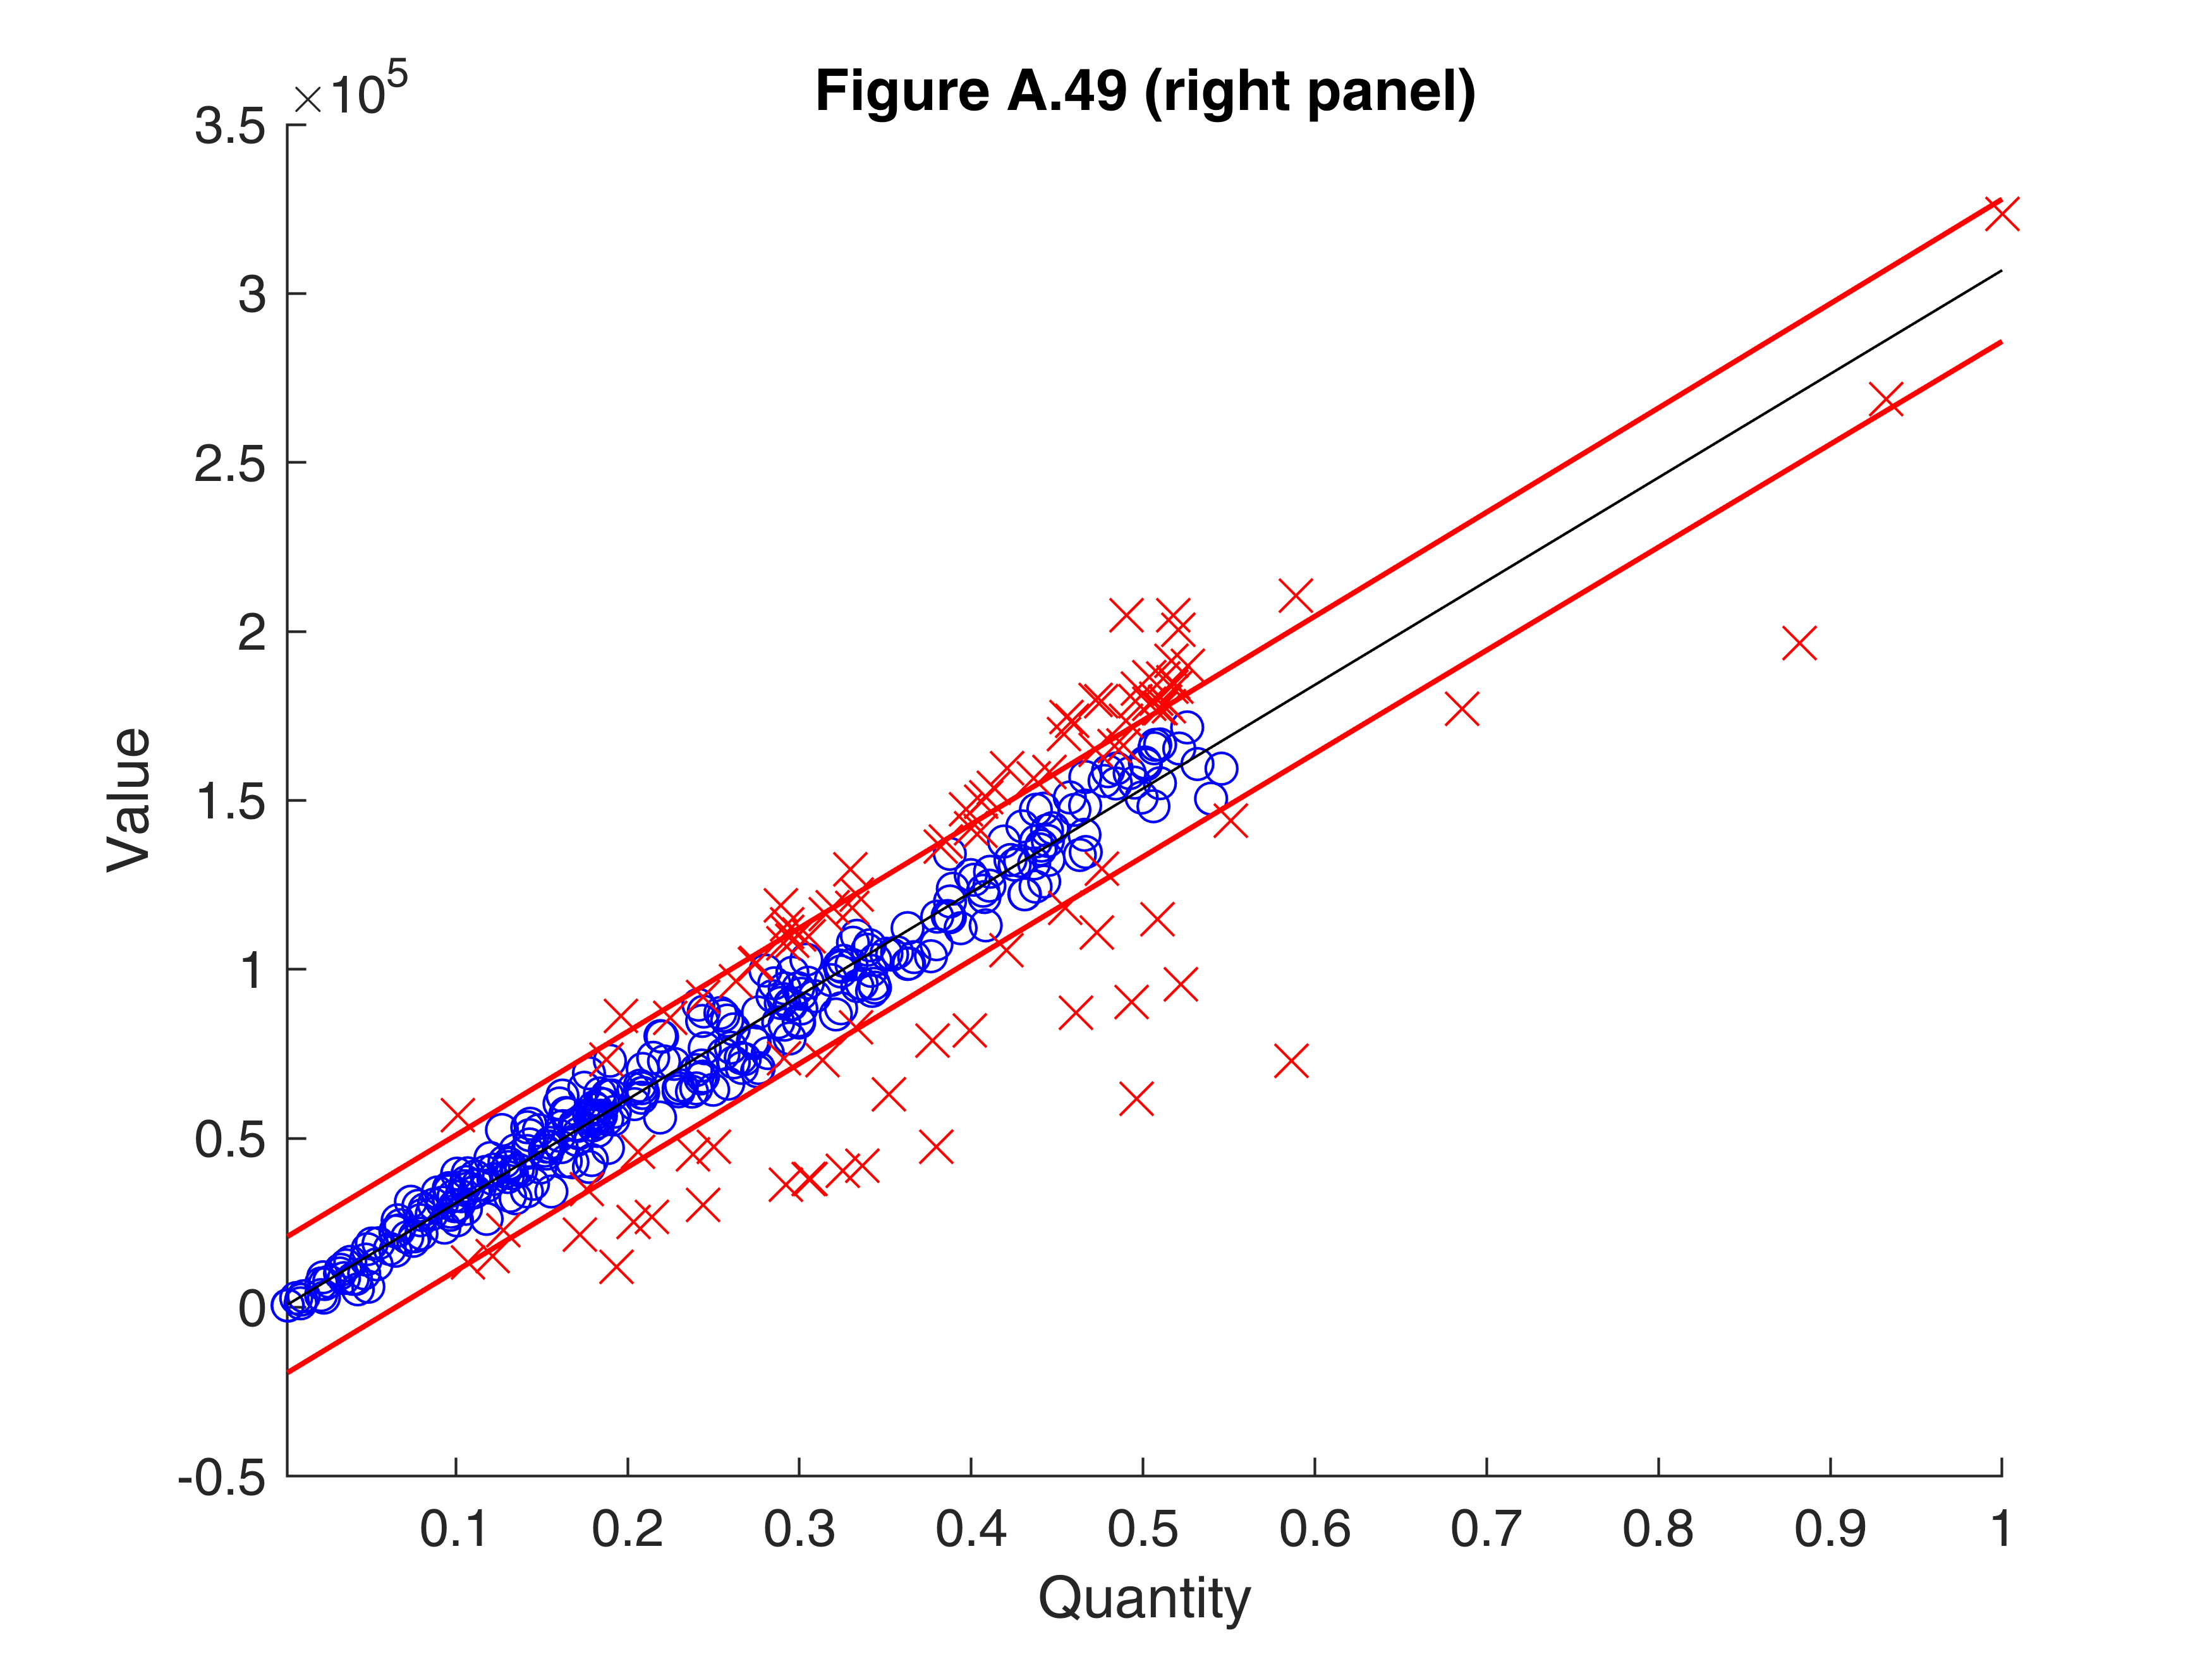

In [8]:
mdl = fitlm(X,y,'Exclude',outHOM.ListOut);
Xnew=(min(X):(max(X)-min(X))/100:max(X))';
[ypred,yci] = predict(mdl,Xnew,'Prediction','observation','alpha',0.01,'Simultaneous','on');
figure
hold('on')
seq=1:length(y);
good=setdiff(seq,outHOM.ListOut);
plot(X(good),y(good),'bo')
plot(X(outHOM.ListOut),y(outHOM.ListOut),'rx','MarkerSize',9); % ,'LineWidth',2)

plot(Xnew,ypred,'k')
plot(Xnew,yci,'r','LineWidth',1)
xlabel('Quantity')
ylabel('Value')
xlim([min(X) max(X)])
if prin==1
    print -depsc P30homobands.eps;
end

set(gcf,'Name', 'Figure A.49 (right panel)');
title('Figure A.49 (right panel)')

In [9]:

%InsideREADME